In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/lunc-dataset/survey lung cancer.csv


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [38]:

df=pd.read_csv('/kaggle/input/lunc-dataset/survey lung cancer.csv')


In [39]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [40]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [42]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})


/tmp/ipykernel_30/804902710.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})


In [43]:

# Convert categorical Gender column to numerical using Label Encoding
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

In [44]:
numeric_columns = df.select_dtypes(include=['int64'])

In [45]:
# correlation_matrix = df.corr()
correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133

Observation: The correlation between LUNG_CANCER and ['GENDER','AGE','SMOKING','SHORTNESS OF BREATH'] are very low. Therefore, we can consider this feature less relevant in this case and drop it from the DataFrame.

In [46]:
df1 = df.drop(columns=['GENDER','AGE','SMOKING'])


In [47]:
num_columns = df1.shape[1]
num_columns=num_columns-1
num_columns

12

In [48]:
df1.columns

Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
       'LUNG_CANCER'],
      dtype='object')

In [49]:
X=df1.iloc[:,0:num_columns] #selects all rows and the first 15 columns
Y=df1.iloc[:,-1]   #selects all rows and the last column.

In [50]:
X.columns

Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [51]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 309 entries, 0 to 308
Series name: LUNG_CANCER
Non-Null Count  Dtype
--------------  -----
309 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [52]:

# # Convert categorical Gender column to numerical using Label Encoding
# label_encoder = LabelEncoder()
# X['GENDER'] = label_encoder.fit_transform(X['GENDER'])
     

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

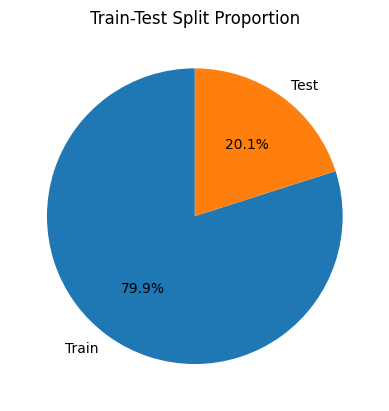

In [54]:
# Plot the proportion of training and testing data
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Train-Test Split Proportion')
plt.savefig('bar.jpg')
plt.show()
     

## Model Training: Logistic Regression


In [55]:
model = LogisticRegression()



In [56]:
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
Y_pred = model.predict(X_test)

In [58]:
accuracy_lr = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.90


### Precision score: the ratio of correctly predicted positive observations to the total predicted positives

In [59]:
print("Precision:", precision_score(Y_test, Y_pred, average='weighted'))


Precision: 0.8982334869431644


### Recall score: the ratio of correctly predicted positives to all observations in the actual class


In [60]:
print("Recall:", recall_score(Y_test, Y_pred, average='weighted'))


Recall: 0.9032258064516129


### F1 Score: the harmonic mean of precision and recall, balancing both metrics


In [61]:
print("F1 Score:", f1_score(Y_test, Y_pred, average='weighted'))


F1 Score: 0.892921146953405


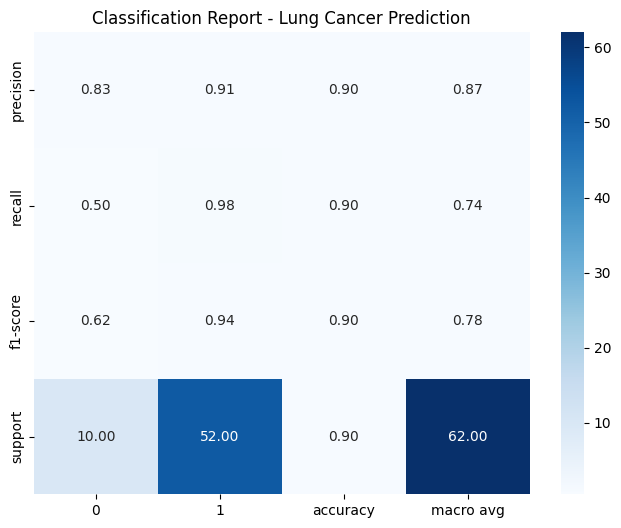

In [62]:
report = classification_report(Y_test, Y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report - Lung Cancer Prediction')
plt.show()

## Model Training: Random Forest


In [63]:
# Train the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = model_rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.94


## MOdel Training - SVM

In [64]:
from sklearn.svm import SVC
# Train the SVM model
model_svm = SVC()
model_svm.fit(X_train, Y_train)

# Make predictions
Y_pred_svm = model_svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")

Support Vector Machine Accuracy: 0.90


## Model Training- XG Boost


In [65]:
from xgboost import XGBClassifier
num_columns = df.shape[1]
num_columns=num_columns-1
X=df.iloc[:,0:num_columns] #selects all rows and the first 15 columns
Y=df.iloc[:,-1] 

In [66]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [67]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 309 entries, 0 to 308
Series name: LUNG_CANCER
Non-Null Count  Dtype
--------------  -----
309 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [68]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
xg_model = XGBClassifier(n_estimators=1000)
xg_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
Y_pred = xg_model.predict(X_test)
acc_log = round(xg_model.score(X_train, Y_train), 4)
acc_log

0.996

Accuracies: [0.9032258064516129, 0.996, 0.9354838709677419, 0.9032258064516129]


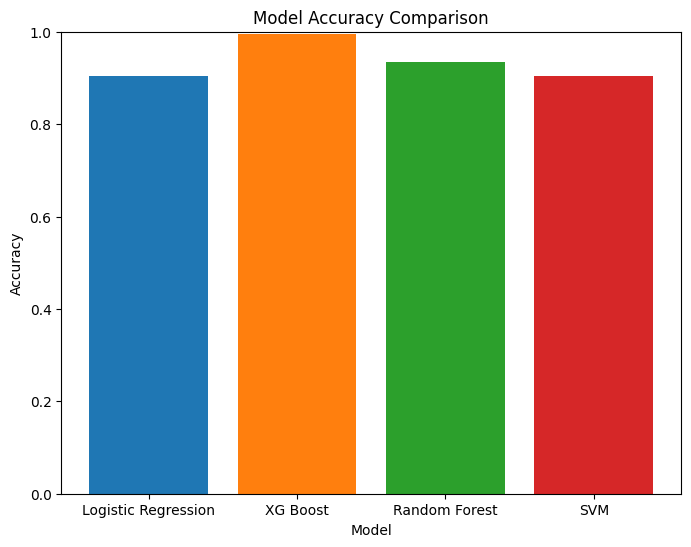

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracy values
models = ['Logistic Regression', 'XG Boost', 'Random Forest', 'SVM']
# Update accuracies with the actual accuracy scores
accuracies = [accuracy_lr,acc_log,  accuracy_rf, accuracy_svm]  # Assuming you have accuracy_dt defined

# Check that all accuracies are valid numbers
print("Accuracies:", accuracies)

# Create a bar chart to visualize the accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0 to 1 (accuracy range)
plt.savefig('accuracy.jpg')
plt.show()